# Simulating Equity Prices with Geometric Brownian Motion

A **Monte Carlo** simulation involves the application of a chosen model, which defines the behavior of a financial instrument, to a substantial number of random trials. The aim is to generate a credible array of potential future outcomes. When simulating stock prices, the prevalent model employed is **Geometric Brownian Motion (GBM)**. GBM posits that there is a constant drift coupled with random shocks. Although the periodic returns in GBM follow a normal distribution, the resulting multi-period price levels, such as those spanning ten days, exhibit a **lognormal distribution** [1].  

**Equation 1** illustrates the formula for the proportional return of a stock:

$
\frac{\Delta S}{S} = \mu \Delta t + \sigma \varepsilon \sqrt{\Delta t} 
$

The first component in this equation represents the expected rate of return, denoted as $\mu$, that a stock is expected to earn over a short period of time $\Delta t$. This component is often referred to as the "certain component." The second component involves a random process, where $\sigma$ represents the expected volatility of the stock, and $\varepsilon \sqrt{\Delta t} $ represents the random volatility, which magnifies as the time period increases [2].

**Equation 2** describes the log-normal distribution of stock prices with a mean corresponding to the certain component and a standard deviation linked to the uncertain component [2]:

$
\ln\left(\frac{S_T}{S_0}\right) \sim \phi\left[\left(\mu - \frac{\sigma^2}{2}\right)T, \sigma \varepsilon \sqrt{T}\right]
$

In this equation:
- $S_0$ is the current stock price,
- $S_T$ is the price at time $T$,
- $\mu$ has been adjusted to $\left(\mu - \frac{\sigma^2}{2}\right)$ to incorporate an uncertainty component responsible for generating fluctuating stock prices.

**Equation 3** demonstrates how to simulate the price of a stock at time $t + \Delta t$ given its price at $t$ using the lognormal distribution [2]:

$
\ln\left(\frac{S_{t+\Delta t}}{S_t}\right) = \left(\mu - \frac{\sigma^2}{2}\right)\Delta t + \sigma \varepsilon \sqrt{\Delta t} 
$

Rearranging Equation 3 results in the final equation used for stock price simulations, as shown in **Equation 4** [2]:

$
S_{t+\Delta t} = S_t \exp\left[\left(\mu - \frac{\sigma^2}{2}\right)\Delta t + \sigma \varepsilon \sqrt{\Delta t} \right]
$

To summarise, in these equations, $S_t$ represents the stock price at time $t$, $\Delta t$ is the time interval for prediction, $\mu$ is the expected annual rate of return, $\sigma$ is the expected annual volatility, and $\varepsilon$ is a randomly drawn number from a normal distribution with a mean of zero and a standard deviation of one, representing random volatility [2].

In [1]:
# import relevant packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define geometric brownian path function

def geo_paths(S, T, r, sigma, steps, N):
    """
    Simulates paths of equity prices using Geometric Brownian Motion.
    
    Parameters
    ----------
    S : int or float
        Initial stock price in USD
    
    T : int or float
        Time to maturity in years (e.g. 1 year = 1, 1 month = 1/12)
        
    r : float
        Annual risk free rate in %
    
    sigma : float
        Annual volatility in %
    
    steps : int
        Smaller unit of time (e.g. 250 for all trading days in a year)
        
    N : int
        Number of paths
    
    Returns
    -------
    [steps, N] : ndarray
        Array of paths of equity price
    """
    
    # convert time into smaller steps
    dt = T / steps 
    
    # return paths using geometric brownian process
    ST = np.log(S) + np.cumsum(((r - sigma**2/2)*dt 
                                + sigma*np.sqrt(dt) 
                                * np.random.normal(size=(steps,N))), 
                               axis=0)
    
    return np.exp(ST)

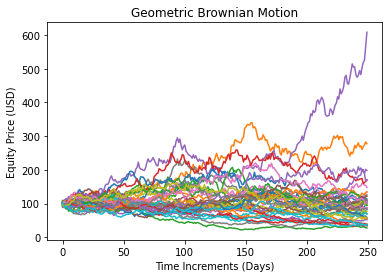

In [3]:
# simulate equity prices with monte carlo simulation

# set arguments for simulation
S = 100 # initial equity price S_{0} in USD
T = 1 # time to maturity
r = 0.05 # annual risk free rate in %
sigma = 0.60 # annual volatility in %
steps = 250 # time steps
N = 40 # number of paths

# call geometric brownian path function
paths = geo_paths(S, T, r, sigma, steps, N)

# visualise paths
plt.plot(paths)
plt.xlabel("Time Increments (Days)")
plt.ylabel("Equity Price (USD)")
plt.title("Geometric Brownian Motion")
plt.show()

## References
[1] https://www.investopedia.com/articles/07/montecarlo.asp  
[2] https://ro.uow.edu.au/cgi/viewcontent.cgi?article=1705&context=aabfj  